In [3]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'] #csv does not contain header row
pima = pd.read_csv(url, header=None, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
features_col = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[features_col]
y = pima.label

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred_class = logreg.predict(X_test)

In [10]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


## Null Accuracy ##

In [12]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [13]:
y_test.mean()

0.3229166666666667

In [14]:
1 - y_test.mean()

0.6770833333333333

In [15]:
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [17]:
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

In [19]:
print('True: ', y_test.values[:25])
print('Pred: ', y_pred_class[:25])

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


| n=192 | Predicted = 0 | Predicted = 1 |
| :--: | :--: | :--: |
|Actual = 0| 118 | 12 | 
|Actual = 1| 47 | 15|

| n=192 | Predicted = 0 | Predicted = 1 |
| :--: | :--: | :--: |
|Actual = 0| True Negative  | False Positive | 
|Actual = 1| False Negative | True Positive|

| n=192 | Predicted = 0 | Predicted = 1 |
| :--: | :--: | :--: |
|Actual = 0| TN | FP (Type I error) | 
|Actual = 1| FN (Type II error) | TP|

In [22]:
print('True: ', y_test.values[:25])
print('Pred: ', y_pred_class[:25])

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [24]:
print((TN+TP)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


In [25]:
# Classification Error : missclassification rate
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.307291666667


In [28]:
# Sensitivity
print(TP / (TP+FN))
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


In [29]:
# Specificity 
print(TN / (TN+FP))

0.907692307692


In [30]:
# False positive rate
print(FP / (TN+FP))

0.0923076923077


In [32]:
# Precision
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


## Adjusting the classification thresshold ##

In [33]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [34]:
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [35]:
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [36]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

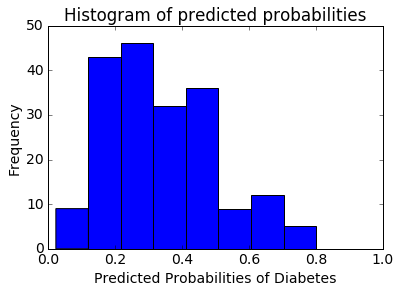

In [41]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted Probabilities of Diabetes")
plt.ylabel("Frequency")

## Decrease to threashold to increase the sensitivity ##

In [42]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

/Users/hs3m/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [43]:
y_pred_prob[:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [44]:
y_pred_class[:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [45]:
print(confusion)

[[118  12]
 [ 47  15]]


In [46]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [50]:
# sensitivity increased
print(46/float(46+16))

0.7419354838709677


In [51]:
# specificity decreases
print(80/(80+50))

0.6153846153846154


## ROC Curves and AUC ##

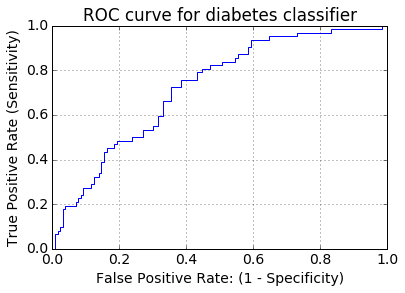

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel('False Positive Rate: (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [64]:
def evaluate_threshold(threshold):
    print("Sensitivity", tpr[thresholds > threshold][-1])
    print("Specificity", 1 - fpr[thresholds > threshold][-1])

In [65]:
evaluate_threshold(0.5)

Sensitivity 0.241935483871
Specificity 0.907692307692


In [66]:
evaluate_threshold(0.3)

Sensitivity 0.725806451613
Specificity 0.615384615385


In [67]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


In [68]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.73782336182336183